In [1]:
#downloading MINST dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

In [2]:
print(f"Number of trainingsamples {len(train_dataset)} \n number of test samples {len(test_dataset)}")

Number of trainingsamples 60000 
 number of test samples 10000


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

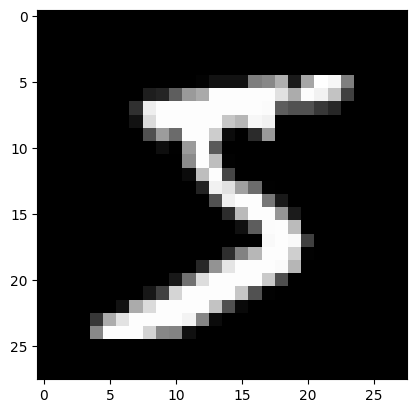

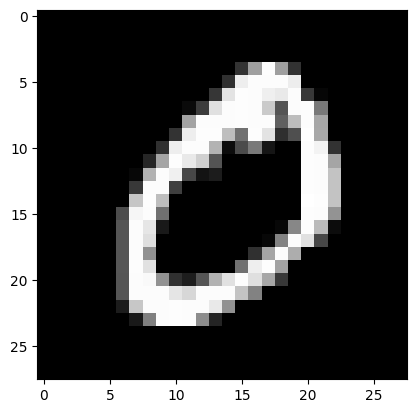

In [3]:
import matplotlib.pyplot as plt
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
print(img_5)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [4]:
from torch.utils.data import DataLoader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [5]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [6]:
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [7]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.1931488513946533. Accuracy: 63.85
Epoch: 1. Loss: 2.1086697578430176. Accuracy: 72.46
Epoch: 2. Loss: 2.069253921508789. Accuracy: 76.59
Epoch: 3. Loss: 1.9780709743499756. Accuracy: 78.64
Epoch: 4. Loss: 2.0131523609161377. Accuracy: 79.76
Epoch: 5. Loss: 1.9067975282669067. Accuracy: 80.69
Epoch: 6. Loss: 1.9286344051361084. Accuracy: 81.24
Epoch: 7. Loss: 1.9145528078079224. Accuracy: 81.67
Epoch: 8. Loss: 1.8405994176864624. Accuracy: 82.13
Epoch: 9. Loss: 1.8695086240768433. Accuracy: 82.52


In [8]:
#Linear regression implementation
import torch.nn as nn

lin_reg_model = nn.Sequential(
    nn.Linear(28*28,10),
    nn.Sigmoid()
)
print(lin_reg_model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): Sigmoid()
)


In [9]:
optimizer = torch.optim.Adam(lin_reg_model.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = lin_reg_model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = lin_reg_model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.5960596799850464. Accuracy: 89.89
Epoch: 1. Loss: 1.6343804597854614. Accuracy: 90.55
Epoch: 2. Loss: 1.5640721321105957. Accuracy: 90.88
Epoch: 3. Loss: 1.5558768510818481. Accuracy: 91.11
Epoch: 4. Loss: 1.5096832513809204. Accuracy: 91.18
Epoch: 5. Loss: 1.5835093259811401. Accuracy: 91.18
Epoch: 6. Loss: 1.5856853723526. Accuracy: 91.51
Epoch: 7. Loss: 1.5880541801452637. Accuracy: 91.43
Epoch: 8. Loss: 1.5695825815200806. Accuracy: 91.53
Epoch: 9. Loss: 1.5651061534881592. Accuracy: 91.5


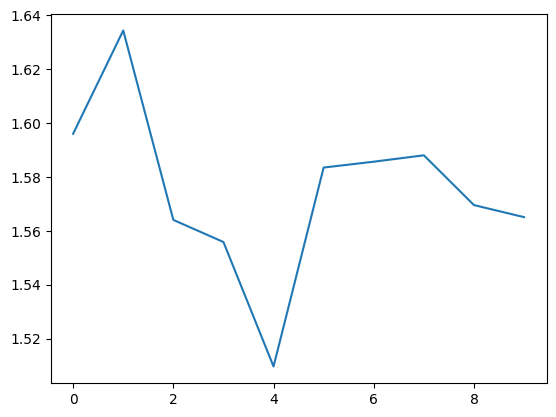

In [10]:
plt.plot(range(len(Loss)), Loss)
#plt.plot(range(len(acc)), acc)

In [11]:
from sklearn import datasets # Import train_test_split function
from sklearn.model_selection import train_test_split  #Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [12]:
images_train, labels_train = zip(*train_dataset)
images_train = np.array(images_train)
labels_train = np.array(labels_train)

In [22]:
clf = svm.SVC(kernel="linear", verbose=True)
images_train = images_train.reshape(images_train.shape[0], -1)


In [23]:
images_train.shape

(60000, 784)

In [24]:
clf.fit(images_train, labels_train)

[LibSVM]*.*
optimization finished, #iter = 1037
obj = -2.774438, rho = 1.316408
nSV = 84, nBSV = 0
.................*..........*
optimization finished, #iter = 27893
obj = -100.721549, rho = 0.946876
nSV = 342, nBSV = 53
.........*.....*
optimization finished, #iter = 14848
obj = -40.672540, rho = 0.386566
nSV = 252, nBSV = 10
...*.*
optimization finished, #iter = 4785
obj = -15.302096, rho = 0.861576
nSV = 168, nBSV = 0
.....................*...................*..*
optimization finished, #iter = 41500
obj = -170.228609, rho = 2.424265
nSV = 408, nBSV = 103
...........*........*
optimization finished, #iter = 19049
obj = -86.214153, rho = 0.491859
nSV = 289, nBSV = 42
..*.*
optimization finished, #iter = 3743
obj = -10.491600, rho = 1.575960
nSV = 161, nBSV = 0
..............*..........*
optimization finished, #iter = 24244
obj = -92.068327, rho = 0.038074
nSV = 293, nBSV = 43
.......*.....*
optimization finished, #iter = 12288
obj = -37.085006, rho = 0.235247
nSV = 225, nBSV = 8
.....

SVC(kernel='linear', verbose=True)

In [16]:
images_test, labels_test = zip(*test_dataset)
images_test = np.array(images_test)
labels_test = np.array(labels_test)
images_test = images_test.reshape(images_test.shape[0], -1)
svm_pred = clf.predict(images_test)

In [17]:
print(metrics.accuracy_score(labels_test, svm_pred))

0.9404


In [18]:
from sklearn.ensemble import RandomForestClassifier 

In [20]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(images_train, labels_train)

RandomForestClassifier()

In [21]:
rf_pred = rf.predict(images_test)
metrics.accuracy_score(rf_pred, labels_test)

0.9685